In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv("crop_recommendation1.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [45]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
corr = df.corr()

C:\Users\Karim\AppData\Local\Temp\ipykernel_10444\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

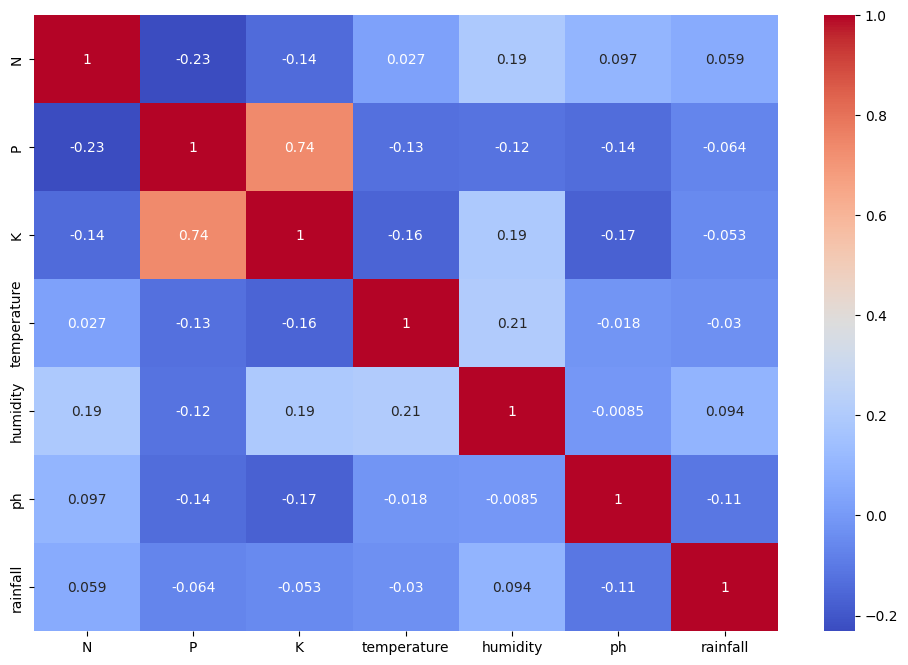

In [48]:
# Plot the correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [49]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

C:\Users\Karim\AppData\Local\Temp\ipykernel_10444\1457326482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'])


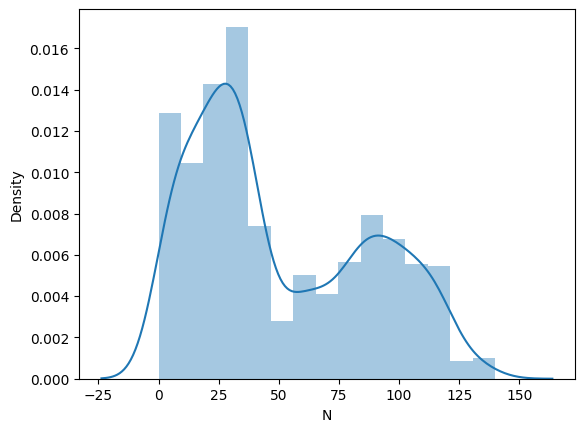

In [50]:
import matplotlib.pyplot as plt
sns.distplot(df['N'])
plt.show()

In [51]:
import pickle
# Encoding the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [52]:
df['label_enc'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label_enc, dtype: int64

In [53]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_enc
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [54]:
# Train and test split
# X and y
X = df.drop(['label', 'label_enc'], axis=1)
# Label
y = df['label_enc']

In [55]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [56]:
#X and y shape
X.shape, y.shape

((2200, 7), (2200,))

In [57]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Scale features using minMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [60]:
# Standarzation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create an instance of all the models
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9568181818181818
Decision Tree  with accuracy : 0.9840909090909091
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9863636363636363
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.9113636363636364


In [62]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [78]:
import numpy as np
import pickle

# Load the saved model from the pickle file
with open('Crop_Recommend_model.pkl', 'rb') as file:
    rfc = pickle.load(file)

def recommendation(N, P, k, temperature, humidity, ph, rainfal):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfal]])
    transformed_features = scaler.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1, -1)
    
    return prediction[0]

In [88]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100
# Make predictions
recommendation(N,P,k,temperature,humidity,ph,rainfall)

# check if the prediction is in the encoded labels
le.inverse_transform(recommendation(N,P,k,temperature,humidity,ph,rainfall))

array(['papaya'], dtype=object)

In [65]:
# Save the model
import joblib
joblib.dump(rfc, 'crop_recommendation_model.pkl')


['crop_recommendation_model.pkl']

In [66]:
import pickle
pickle.dump(rfc,open('Crop_Recommend_model.pkl','wb'))
pickle.dump(scaler,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [31]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains the crop labels
label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_enc, f)

In [76]:
import joblib
import pickle

# Load the saved model and label encoder
model = joblib.load('Crop_Recommend_model.pkl')
label_enc = pickle.load(open('label_encoder.pkl', 'rb'))

# Define input parameters
N = 10
P = 10
k = 10
temperature = 10.0
humidity = 2
ph = 1
rainfall = 1

# Make predictions
predict = model.predict([[N, P, k, temperature, humidity, ph, rainfall]])

# Decode the predicted label
try:
    # Ensure the prediction is in the correct format for inverse_transform
    crop = label_enc.inverse_transform([predict[0]])[0]
    print("{} is a best crop to be cultivated ".format(crop))
except ValueError:
    print("Sorry, we are not able to recommend a proper crop for this environment")

apple is a best crop to be cultivated 
